<a href="https://colab.research.google.com/github/rohan-1314/colab-files/blob/main/2022_10_13_Rohan_Lesson_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 50: CLT II And Standard Normal Distribution

### Teacher-Student Activities

In this class, we will learn the following concepts:

- How to calculate the population mean with 95% probability, using the sample mean and sample standard deviation.

- Normalise an array/series of numeric values using the standard normalisation technique and plot a standard normal distribution curve.

Let's quickly go through the activities covered in the previous class and begin this class from **Activity 1: Sampling Distribution And Standard Error**. 


---

**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

#### Loading Data

In [1]:
# Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's first look at the complete information on the `df` DataFrame.

In [2]:
# DataFrame information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---

#### Activity 1: Sampling Distribution And Standard Error

*If we take several samples of a dataset (or population) such that each sample contains sufficient number of observations, then the mean of all the sample means will be very close or nearly equal to the population mean*

This is called **Central Limit Theorem (CLT)**. 
The distribution of sample means of a population is called a **sampling distribution.**


The sampling distribution has the following three properties:

1. The mean of a sampling distribution (denoted by $\mu_\bar{X}$) is equal to the population mean (denoted by $\mu$). Hence, 
$$\mu_\bar{X} = \mu$$
2. The standard deviation (or **standard error**) in the sampling distribution (denotes as $\text{SE}$) is the ratio of the sample standard deviation ($s$) to the square root of sample size. It is given as $\text{SE} = \frac{s}{\sqrt{n}}$, where $n$ is the sample size.
3. For $n \ge 30$, the sampling distribution follows the normal distribution (bell curve).





---

#### Activity 2: Population Mean Estimation Using CLT^

Now using CLT, let's learn to compute the population mean using the sample mean and sample standard deviation. 

This concept will be helpful when we don't know the population mean. In this case, we can easily calculate the population mean and population standard deviation because we have the dataset for the population. But many times in the real world, we have the dataset for a small sample and using the sample mean and sample standard deviation we will have to find the population mean.

To learn this concept, let's consider the population of the patients having heart disease.


In [5]:
# S2.1: Create a Pandas series containing cholesterol values for the patients having heart disease. 
chol_disease = df.loc[df['target']==1,'chol']
chol_disease

0      233
1      250
2      204
3      236
4      354
      ... 
160    240
161    342
162    157
163    175
164    175
Name: chol, Length: 165, dtype: int64

In [4]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


So there are 165 patients who have heart disease. Hence, in this case, our population dataset consists of 165 observations. Now, let's calculate the population mean and population standard deviation for this dataset.

In [6]:
# S2.2: Calculate population mean and population standard deviation for the patients having heart disease.
print(chol_disease.mean())
chol_disease.std()

242.23030303030302


53.55287155453833

Now let's take a sample of (say 50) patients out of 165 patients having heart disease and compute the mean cholesterol level along with the standard deviation.

**Note:** Choose a sample size of at least 30 so that the sampling distribution follows the normal distribution.

In [7]:
# S2.3: Create a sample of 50 patients out of 165 patients having heart disease.
chol_disease_sample = chol_disease.sample(n=50)
chol_disease_sample

6      294
127    277
81     308
58     182
9      168
48     216
24     199
154    220
117    193
75     250
115    215
44     321
38     269
126    204
13     211
70     258
139    263
151    149
85     564
60     265
144    197
59     303
156    253
79     240
21     233
12     266
130    201
27     175
107    236
63     203
10     239
159    221
82     318
40     308
111    126
57     260
5      192
8      199
148    226
0      233
112    313
147    240
136    178
101    270
46     235
137    208
23     243
120    303
100    244
158    220
Name: chol, dtype: int64

Let's compute mean cholesterol level along with standard deviation for the sample of patients having heart disease.

In [15]:
# S2.4: Compute mean cholesterol level along with standard deviation for the patients having heart disease.
sample_std =chol_disease_sample.std()
sample_mean =chol_disease_sample.mean()


Now, using CLT, with 95% probability (or confidence), you can say that the population mean $\mu$ of cholesterol level for the patients having heart disease will lie between $\left(\text{sample mean} - 2 \times \frac{\text{sample standard deviation}}{\sqrt{\text{sample size}}}\right)$ and $\left(\text{sample mean} + 2 \times \frac{\text{sample standard deviation}}{\sqrt{\text{sample size}}}\right)$

**Recall Normal Distribution**

1. Approx. 68% of the values lie within one-sigma interval around the mean.

2. Approx. 95% of the values lie within a two-sigma interval around the mean.

3. Approx. 99.7% of the values lie within a three-sigma interval around the mean.

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/vecstock-norm-dist.jpg' width = 700>


Now, with 95% probability (or confidence), calculate the population mean of cholesterol level for the patients having heart disease using the sample mean and sample standard deviation.

In [16]:
# S2.5: With 95% probability, calculate the population mean of cholesterol level using the sample mean and sample standard deviation.
sample_sqrt = np.sqrt(chol_disease_sample.size)
std_error = sample_std/sample_sqrt
std_form = sample_mean -2*(std_error)
std_form2 = sample_mean +2*(std_error)
print(std_form,std_form2)

223.8791410929789 260.4808589070211


So, with 95% probability (or confidence), the population mean $\mu$ of cholesterol level for the patients having heart disease will fall in the above interval. In fact, the population mean is 242.23 which falls in the above interval.

Similarly, using CLT, with 68% probability (or confidence), you can say that the population mean $\mu$ of cholesterol level for the patients having heart disease will lie between $\left(\text{sample mean} - \frac{\text{sample standard deviation}}{\sqrt{\text{sample size}}}\right)$ and $\left(\text{sample mean} + \frac{\text{sample standard deviation}}{\sqrt{\text{sample size}}}\right)$


Now, with 68% probability (or confidence), calculate the population mean of cholesterol level for the patients having heart disease using the sample mean and sample standard deviation.

In [18]:
# S2.6: Calculate the 68% confidence interval for the population mean of cholesterol level using the sample mean and standard error.
std_68_minus = sample_mean -(std_error)
std_68_plus = sample_mean +(std_error)
print(std_68_minus,std_68_plus)

233.02957054648945 251.33042945351056


So, with 68% probability (or confidence), the population mean $\mu$ of cholesterol level for the patients having heart disease will fall in the above interval. Since the probability is slightly lower, the population mean (which is 242.23 in this case) may or may not fall in the above interval.

Now lastly, let's calculate the mean of cholesterol level for the patients not having heart disease to compare it with the average cholesterol level for the patients having heart disease.

In [19]:
# S2.7: Calculate the population mean of the cholesterol level for the patients not having heart disease.
chol_not_disease = df.loc[df['target']==0,'chol']
chol_not_disease.mean()

251.08695652173913

So on comparing only the means of cholesterol values, it is quite clear that on an average people having lower cholesterol levels are likely to have heart disease.

You can also create a box plot to visualise the spread of the `chol` values in the case of patients having heart disease and not having heart disease.

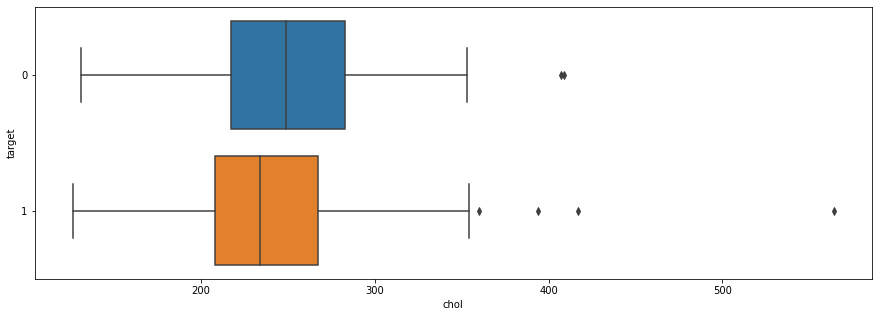

In [21]:
# S2.8: Create a box plot to compare the spread of means in the case of patients having heart disease and not having it.
plt.figure(figsize = (15,5))
sns.boxplot(x=df['chol'],y=df['target'],orient='h')
plt.show()

From the box plot, you can see that the first, second (or median) and third quartiles of the cholesterol values for the patients having heart disease (shown with the orange colour) are lower as compared to the ones for the patients not having it (shown with the blue colour). Hence, we can confidently say that people having lower cholesterol levels are more likely to have heart disease.

---

#### Activity 3: Standard Normalisation (or Scaling)^^

Now let's learn the concept of standard normalisation which is another normalisation technique to reduce the size of the numeric values. When you normalise an array/series of values using the standard normalisation technique, the mean of all the normalised values will be 0 and the standard deviation will be 1.

Let's normalise all the `chol` values to understand this concept. To do this, you need to calculate  $Z$-score for each value. It is given by the following expression:

$$Z = \frac{X - \mu}{\sigma}$$

where 

- $X$ is an observation 

- $\mu$ is the population mean

- $\sigma$ is the population standard deviation


In [25]:
# S3.1 Calculate the z-score for the first observation in the 'chol_having_disease' Pandas series.
z_score_1 = (chol_disease_sample[0]-sample_mean)/sample_std
z_score_1

-0.14187837378063503

Let's create a function to calculate the $Z$-score for each value in the `chol_having_disease` series.

In [26]:
# S3.2: Calculate the Z-score for all the values in the 'chol_having_disease' Pandas series.
def z_score(series):
  score = (series-sample_mean)/sample_std
  return score
z_score_disease = z_score(chol_disease_sample)
z_score_disease

6      0.800886
127    0.538149
81     1.017259
58    -0.930092
9     -1.146464
48    -0.404616
24    -0.667354
154   -0.342795
117   -0.760085
75     0.120859
115   -0.420071
44     1.218176
38     0.414507
126   -0.590078
13    -0.481892
70     0.244501
139    0.321776
151   -1.440112
85     4.973780
60     0.352687
144   -0.698264
59     0.939983
156    0.167225
79    -0.033692
21    -0.141878
12     0.368142
130   -0.636444
27    -1.038278
107   -0.095513
63    -0.605533
10    -0.049147
159   -0.327340
82     1.171810
40     1.017259
111   -1.795581
57     0.275411
5     -0.775540
8     -0.667354
148   -0.250064
0     -0.141878
112    1.094534
147   -0.033692
136   -0.991912
101    0.429963
46    -0.110968
137   -0.528257
23     0.012673
120    0.939983
100    0.028128
158   -0.342795
Name: chol, dtype: float64

Now let's calculate the mean and standard deviation of all the $Z$-scores. The mean value should be 0 and the standard deviation should be 1.

In [28]:
# S3.3: Calculate the mean and standard deviation of all the Z-scores. 
print(z_score_disease.std())
z_score_disease.mean()


1.0


-1.0658141036401502e-16

The process of calculating the $Z$-score for all the observations in an array/series is called **standard normalisation** or **standard scaling**. 

*Remember that the mean and standard deviation of the standard normalised values will be always 0 and 1 respectively.*

---

#### Activity 4: Standard Normal Distribution^^^

After normalising the values in an array/sereies (that follows normal distribution), if you plot it again, you will get a normal distribution as shown in the image below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/standard-normal-distribution.png' width = 800>

The values on the $x$-axis can be represented with their corresponding $Z$-scores.

In the case of standard normal distribution, 

- $\mu = 0$ therefore, $Z = 0$ and

- $\sigma = 1$ therefore, $Z = 1$

So

- $\mu - \sigma = -1 \Rightarrow Z = -1$

- $\mu - 2\sigma = -2 \Rightarrow Z = -2$

- $\mu - 3\sigma = -3 \Rightarrow Z = -3$

- $\mu + \sigma = 1 \Rightarrow Z = 1$

- $\mu + 2\sigma = 2 \Rightarrow Z = 2$

- $\mu + 3\sigma = 3 \Rightarrow Z = 3$




Let's, calculate the $Z$-score for all the values in the `chol_not_having_disease` Pandas series and then plot its probability distribution without histogram.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


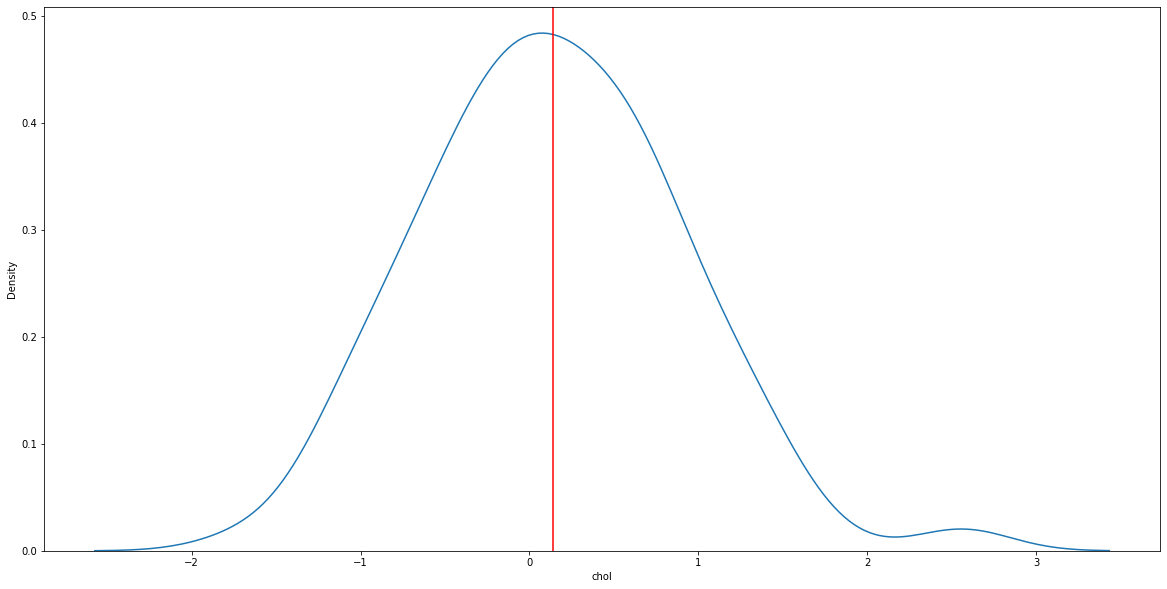

In [32]:
# S4.1: Calculate the Z-score for all the values in the 'chol_not_having_disease' Pandas series and plot its probability distribution.
z_score_not_disease = z_score(chol_not_disease)
plt.figure(figsize=(20,10))
sns.distplot(z_score_not_disease,hist=False)

plt.axvline(z_score_not_disease.mean(),color='red')
plt.show()

Since the `chol_not_having_disease` follows normal distribution, its normalised version, i.e., `chol_no_disease_zscores` also follows normal distribution.

Let's stop here. In the next class, we will learn to calculate probability of a continuous random variable using $Z$-score and cumulative distribution function.

---

### **Project**
You can now attempt the **Applied Tech. Project 50 - CLT II and Standard Normal Distribution** on your own.

**Applied Tech. Project 50 - CLT II and Standard Normal Distribution**: https://colab.research.google.com/drive/1w8cutyW6OvlkPrOKUBiMWvOiOs0X_WOO?usp=sharing

---